<a href="https://colab.research.google.com/github/Darius2527/LifeExpectancy-Regression/blob/main/LifeExpectancyRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing dataset
import numpy as np
import pandas as pd
df=pd.read_csv('LifeExpectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df.shape

(2938, 22)

In [3]:
#checking for null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
#removing rows with null values
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [6]:
df['Status'].value_counts()

Status
Developing    1407
Developed      242
Name: count, dtype: int64

In [7]:
#encoding the classes of 'Status' column
df['Status']= df['Status'].map({'Developing':0,'Developed':1})
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


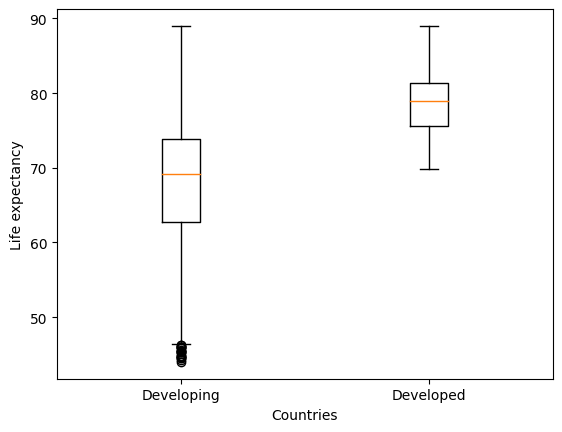

In [8]:
#let us view the life expectancy plot of developed and developing nations
import matplotlib.pyplot as plt
plt.boxplot([df[df['Status']==0]['Life expectancy '], df[df['Status']==1]['Life expectancy ']], labels=['Developing','Developed'])
plt.ylabel('Life expectancy')
plt.xlabel('Countries')
plt.show()
#we can see that the life expectancy is higher and more stable for developed countries

In [9]:
df.sort_values(by='Life expectancy ').head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
910,Malawi,2002,0,44.0,67.0,46,1.10,3.885395,64.0,92,...,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
1644,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
845,Lesotho,2005,0,44.5,675.0,5,2.67,57.903698,87.0,0,...,88.0,6.30,89.0,34.8,862.946312,1949543.0,9.3,9.2,0.437,10.7
1645,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1643,Zimbabwe,2005,0,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3


<Axes: xlabel='GDP', ylabel='Life expectancy '>

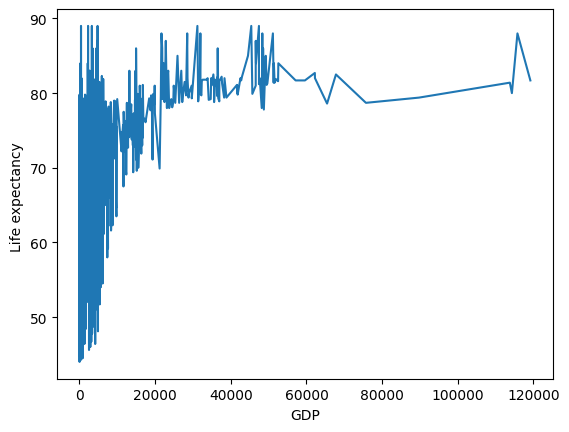

In [12]:
#let us visualize the relation between life expectancy and gdp
import seaborn as sns
sns.lineplot(x='GDP',y='Life expectancy ',data=df)
#we can see that life expectancy and gdp are positively correlated

In [13]:
#lets label encode the coutry column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


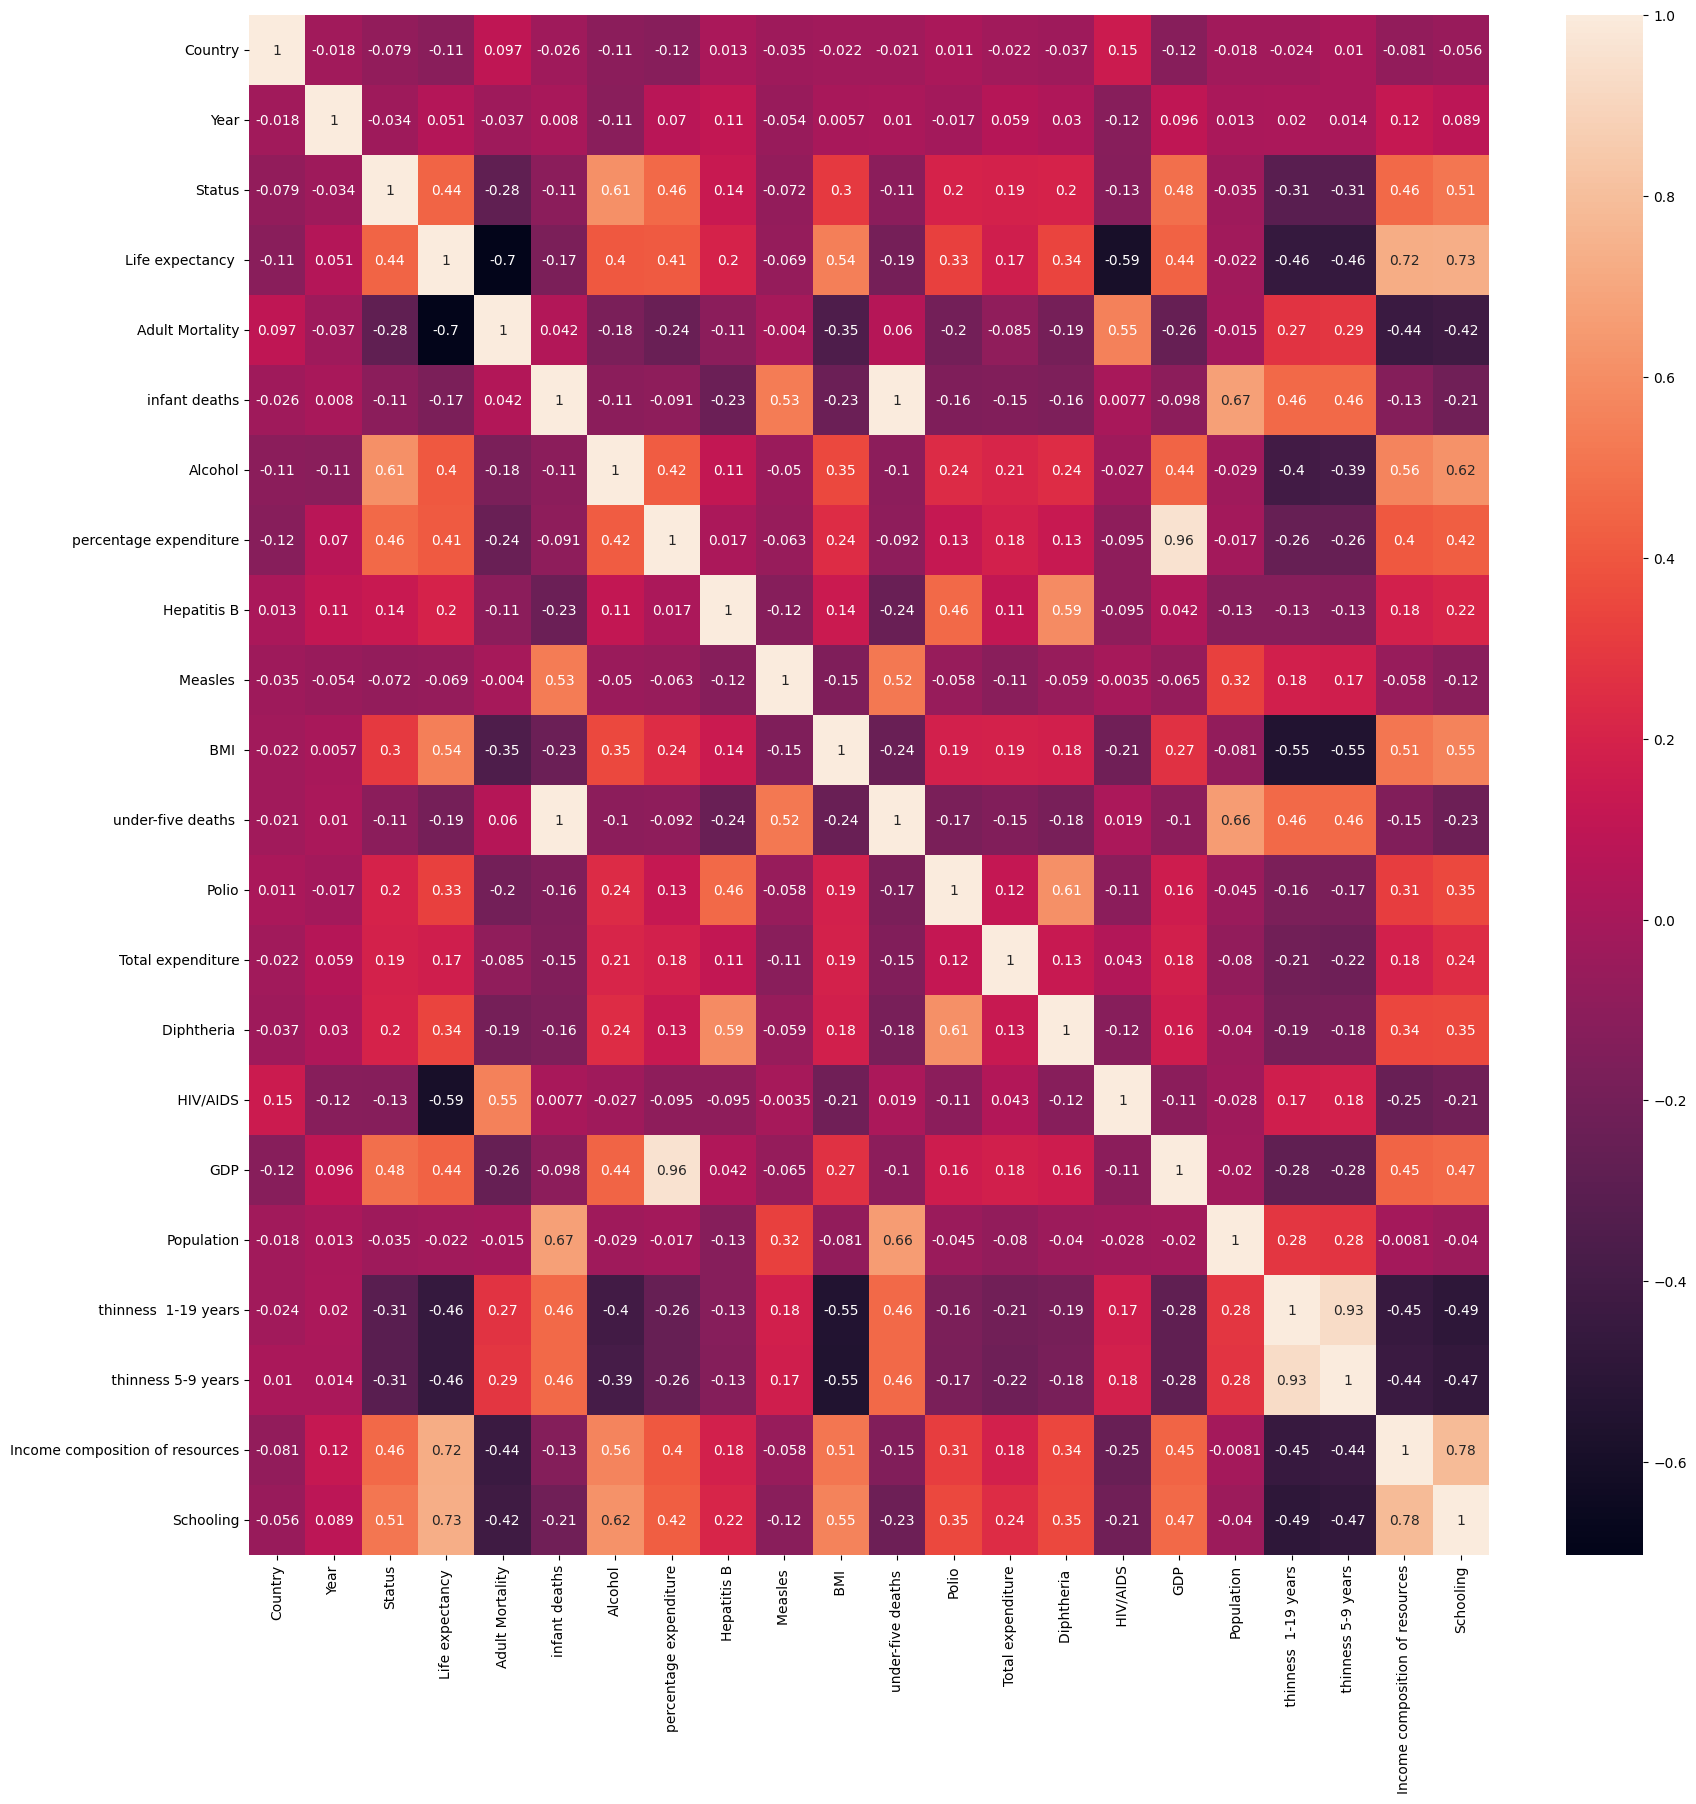

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
#Infant deaths and Under-Five deaths are positively correlated so we need to drop one of them.
#GDP and percentage expenditure are highly correlated too.
#Also thinness 1-19 years and thinness 5-9 are highly correlated.
#income composition of resources and schooling are also highly correlated
#lets drop infant deaths, percentage expenditure, thinness 5-9, and income composition of resources columns

In [16]:
df.drop(labels=['Income composition of resources', ' thinness 5-9 years',
                'infant deaths', 'percentage expenditure'], axis=1,inplace=True)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,0,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,10.1
1,0,2014,0,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,0,2013,0,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,0,2012,0,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,9.8
4,0,2011,0,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5


In [17]:
#splitting target from independant features
Y=df['Life expectancy ']
X=df.drop(['Life expectancy '],axis=1)


In [18]:
X

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,10.1
1,0,2014,0,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,0,2013,0,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,0,2012,0,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,9.8
4,0,2011,0,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,132,2004,0,723.0,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
1645,132,2003,0,715.0,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.5
1646,132,2002,0,73.0,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,10.0
1647,132,2001,0,686.0,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,9.8


In [19]:
Y=Y.to_numpy()
Y

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

In [20]:
print(X.shape)
print(Y.shape)

(1649, 17)
(1649,)


In [36]:
#applying our first model: linear regression
#we will create a pipeline so we can apply cross validation while automaticall applying stadard scaler fit transform to train data and standard scaler transform to test data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeline=Pipeline([('scaler',StandardScaler()),('model',LinearRegression())])
scores=cross_val_score(pipeline,X,Y,cv=5,scoring='neg_mean_squared_error')
print(scores)
lr_score=scores.mean()
print(lr_score)

[-16.92325419 -19.94619168 -17.03230001 -13.86449038 -20.54030678]
-17.661308607917714


In [38]:
#let us do the same using random forest regressor
from sklearn.ensemble import RandomForestRegressor
pipeline=Pipeline([('scaler',StandardScaler()),('model',RandomForestRegressor())])
scores=cross_val_score(pipeline,X,Y,cv=5,scoring='neg_mean_squared_error')
print(scores)
rf_score=scores.mean()
print(rf_score)

[-8.43041905 -8.53262317 -8.42091633 -6.48363454 -9.64651136]
-8.302820888094313


In [39]:
#gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
pipeline=Pipeline([('scaler',StandardScaler()),('model',GradientBoostingRegressor())])
scores=cross_val_score(pipeline,X,Y,cv=5,scoring='neg_mean_squared_error')
print(scores)
gb_score=scores.mean()
print(gb_score)

[-7.14189862 -8.33664086 -9.08518728 -5.6939465  -8.70820791]
-7.793176233679837


In [40]:
#support vector regressor
from sklearn.svm import SVR
pipeline=Pipeline([('scaler',StandardScaler()),('model',SVR())])
scores=cross_val_score(pipeline,X,Y,cv=5,scoring='neg_mean_squared_error')
print(scores)
svr_score=scores.mean()
print(svr_score)

[-20.67567898 -16.95504928 -21.60651814 -15.73963645 -33.36173643]
-21.667723857439213


In [41]:
from sklearn.linear_model import Ridge
pipeline=Pipeline([('scaler',StandardScaler()),('model',Ridge())])
scores=cross_val_score(pipeline,X,Y,cv=5,scoring='neg_mean_squared_error')
print(scores)
ridge_score=scores.mean()
print(ridge_score)

[-16.92288089 -19.93430825 -17.03734614 -13.8612342  -20.5231581 ]
-17.655785515848812


In [42]:
from sklearn.linear_model import Lasso
pipeline=Pipeline([('scaler',StandardScaler()),('model',Lasso())])
scores=cross_val_score(pipeline,X,Y,cv=5,scoring='neg_mean_squared_error')
print(scores)
lasso_score=scores.mean()
print(lasso_score)

[-17.4695204  -18.90555171 -20.11158936 -15.32277394 -17.85201997]
-17.932291074837938


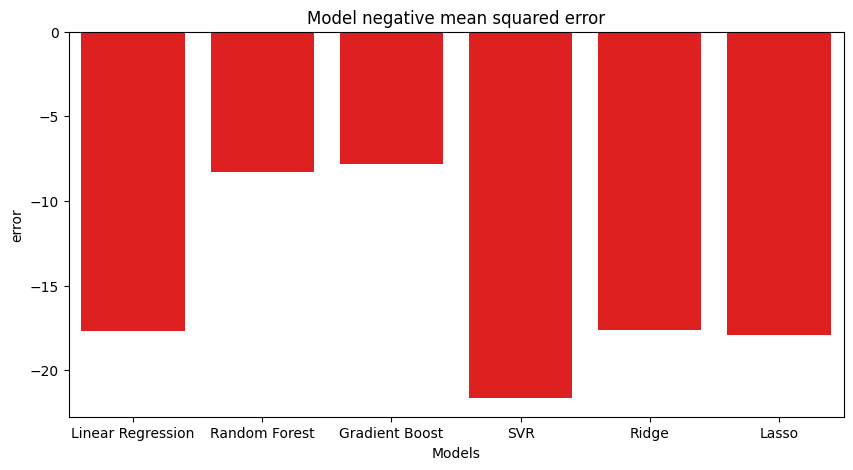

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x=['Linear Regression','Random Forest','Gradient Boost','SVR','Ridge','Lasso'],y=[lr_score,rf_score,gb_score,svr_score,ridge_score,lasso_score],color='red')
plt.xlabel('Models')
plt.ylabel('error')
plt.title('Model negative mean squared error')
plt.show()

In [ ]:
#gradient boosing regressor has the lowest error followed by Random Forest